In [3]:
import pandas as pd
import duckdb as db
import os

# Läs in ansökningar
ansokningar_files = [
    "../src/data/kursdata/ansokningar-2021.xlsx",
    "../src/data/kursdata/ansokningar-2023.xlsx",
    "../src/data/kursdata/ansokningar-2024.xlsx"
]

ansokningar_df = pd.concat([pd.read_excel(file) for file in ansokningar_files], ignore_index=True)

# Läs in beviljade
beviljade_files = [
    "../src/data/kursdata/Beviljade-kurser-2020-vår.xlsx",
    "../src/data/kursdata/Beviljade-kurser-2020-vår.xlsx",
    "../src/data/kursdata/Beviljade-kurser-2021.xlsx",
    "../src/data/kursdata/Beviljade-kurser-2022.xlsx",
    "../src/data/kursdata/Beviljade-kurser-2023.xlsx",
    "../src/data/kursdata/Beviljade-kurser-2024.xlsx"
    
]

beviljade_df = pd.concat([pd.read_excel(file) for file in beviljade_files], ignore_index=True)

# Visa de första raderna i varje DataFrame
print("Ansökningar DataFrame:\n", ansokningar_df.head())
print("\nBeviljade DataFrame:\n", beviljade_df.head())


Ansökningar DataFrame:
     Diarienummer                             Anordnare namn  \
0  MYH 2021/1303                        YrkesAkademin YH AB   
1  MYH 2021/1312                        YrkesAkademin YH AB   
2  MYH 2021/1339                        YrkesAkademin YH AB   
3  MYH 2021/1341                        YrkesAkademin YH AB   
4  MYH 2021/1346  KompetensUtvecklingsInstitutet Sverige AB   

                                     Utbildningsnamn  \
0          Teknisk svenska inom bygg och anläggning.   
1     Projektering och drift av solcellsanläggningar   
2  Arbetsledare med digitalkompetens inom samhäll...   
3                                        Bid Manager   
4                                     Palliativ vård   

                         Utbildningsområde  Sökt antal  platser 2021  \
0                                   Övrigt                      30.0   
1           Samhällsbyggnad och byggteknik                      40.0   
2           Samhällsbyggnad och byggteknik  

In [4]:
ansokningar_df

,Diarienummer,Anordnare namn,Utbildningsnamn,Utbildningsområde,Sökt antal platser 2021,Sökt antal platser 2022,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner,Sökt utbildningsområde,Sökt antal platser 2023,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025
0,MYH 2021/1303,YrkesAkademin YH AB,Teknisk svenska inom bygg och anläggning.,Övrigt,30.0,30.0,20,Stockholm,Stockholm,Stockholm,1,1,1,NaN,NaN,NaN,NaN,NaN
1,MYH 2021/1312,YrkesAkademin YH AB,Projektering och drift av solcellsanläggningar,Samhällsbyggnad och byggteknik,40.0,80.0,80,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3,NaN,NaN,NaN,NaN,NaN
2,MYH 2021/1339,YrkesAkademin YH AB,Arbetsledare med digitalkompetens inom samhäll...,Samhällsbyggnad och byggteknik,30.0,30.0,50,Skellefteå,Västerbotten,Skellefteå,1,1,1,NaN,NaN,NaN,NaN,NaN
3,MYH 2021/1341,YrkesAkademin YH AB,Bid Manager,"Ekonomi, administration och försäljning",35.0,35.0,70,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3,NaN,NaN,NaN,NaN,NaN
4,MYH 2021/1346,KompetensUtvecklingsInstitutet Sverige AB,Palliativ vård,Hälso- och sjukvård samt socialt arbete,30.0,60.0,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,MYH 2024/995,Hyper Island Program AB - Stockholm,Data Analytics,NaN,NaN,NaN,55,Stockholm,Stockholm,Stockholm,1,1,1,Data/IT,NaN,50.0,0.0,50.0
2065,MYH 2024/996,INSU AB,"Solteknik- installation, säkerhet och regelverk",NaN,NaN,NaN,60,Nyköping,Södermanland,Nyköping-Oxelösund,1,1,1,Teknik och tillverkning,NaN,35.0,0.0,35.0
2066,MYH 2024/997,INSU AB,"Säkerhetsprojektering- brand-, inbrott-, kamer...",NaN,NaN,NaN,95,Nyköping,Södermanland,Nyköping-Oxelösund,1,1,1,Samhällsbyggnad och byggteknik,NaN,0.0,0.0,50.0
2067,MYH 2024/998,Campus Nyköping,Hälsofrämjande och pedagogiska insatser med häst,NaN,NaN,NaN,50,Nyköping,Södermanland,Nyköping-Oxelösund,1,1,1,"Lantbruk, djurvård, trädgård, skog och fiske",NaN,24.0,0.0,0.0


In [5]:
beviljade_df

,Utbildningsområde,Utbildningsnamn,YH-poäng,Anordnare,Kommun 1,Kommun 2,Kommun 3,Kommun 4,Kommun 5,Kommun 6,...,FA-region,Antal kommuner,Antal län,Antal FA-regioner,Beslut,Antal beviljade platser 2023,Antal beviljade platser 2024,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025
0,Data/IT,Affärsinriktad IT-Servicemanager med kompetens...,50,Folkuniversitetet - Stiftelsen Kursverksamhete...,Uppsala,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data/IT,Agil förändringsledning,30,IHM Business School AB Malmö,Malmö,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data/IT,Agila arbetsmetoder & DevOps för utvecklare,40,Lernia Utbildning AB,Malmö,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data/IT,Agile Project Leader,60,Changemaker Educations AB,Stockholm,Boden,Skellefteå,Karlstad,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data/IT,AI för effektiv digital marknadsföring,30,"Göteborgs stad, Yrgo",Göteborg,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,Data/IT,Data Analytics,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Stockholm,1.0,1.0,1.0,Beviljad,NaN,NaN,50.0,0.0,50.0
1961,Teknik och tillverkning,"Solteknik- installation, säkerhet och regelverk",60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Nyköping-Oxelösund,1.0,1.0,1.0,Avslag,NaN,NaN,0.0,0.0,0.0
1962,Säkerhetstjänster,"Säkerhetsprojektering- brand-, inbrott-, kamer...",95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Nyköping-Oxelösund,1.0,1.0,1.0,Avslag,NaN,NaN,0.0,0.0,0.0
1963,"Lantbruk, djurvård, trädgård, skog och fiske",Hälsofrämjande och pedagogiska insatser med häst,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Nyköping-Oxelösund,1.0,1.0,1.0,Beviljad,NaN,NaN,24.0,0.0,0.0


## ansökningar år 2021 - 2025

In [6]:
ansokningar_df.describe()

,Sökt antal platser 2021,Sökt antal platser 2022,YH-poäng,Antal kommuner,Antal län,Antal FA-regioner,Sökt antal platser 2023,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025
count,667.000000,667.000000,2069.000000,2069.000000,2069.000000,2069.000000,521.000000,1402.000000,881.000000,881.000000
mean,31.601199,61.794603,42.965684,1.386177,1.345094,1.347028,28.994242,36.803852,20.104427,38.095346
std,17.714957,37.855043,21.347368,0.912636,0.873421,0.874315,15.124164,19.860704,19.483221,20.070670
min,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,35.000000,30.000000,1.000000,1.000000,1.000000,25.000000,30.000000,0.000000,30.000000
50%,30.000000,60.000000,40.000000,1.000000,1.000000,1.000000,30.000000,35.000000,25.000000,35.000000
75%,35.000000,80.000000,50.000000,1.000000,1.000000,1.000000,35.000000,40.000000,35.000000,50.000000
max,175.000000,300.000000,99.000000,5.000000,5.000000,5.000000,100.000000,160.000000,100.000000,120.000000


In [7]:
ansokningar_df["Utbildningsnamn"].unique()

array(['Teknisk svenska inom bygg och anläggning.',
       'Projektering och drift av solcellsanläggningar',
       'Arbetsledare med digitalkompetens inom samhällsbyggnad', ...,
       'Säkerhetsprojektering- brand-, inbrott-, kamera- och passageanläggningar',
       'Hälsofrämjande och pedagogiska insatser med häst',
       'Futuregames Accessible Game Design'], shape=(1629,), dtype=object)

In [8]:

print(ansokningar_df.columns.to_list())


['Diarienummer', 'Anordnare namn', 'Utbildningsnamn', 'Utbildningsområde', 'Sökt antal  platser 2021', 'Sökt antal platser 2022', 'YH-poäng', 'Kommun', 'Län', 'FA-region', 'Antal kommuner', 'Antal län', 'Antal FA-regioner', 'Sökt utbildningsområde', 'Sökt antal platser 2023', 'Sökt antal platser 2024', 'Sökt antal platser 2024 (start och avslut 2024)', 'Sökt antal platser 2025']


In [9]:
ansokningar_df.columns = ansokningar_df.columns.str.strip()


In [10]:
# Lista med korrekta kolumnnamn (notera extra mellanslag i 'Sökt antal  platser 2021')
platser_kolumner = [
    "Sökt antal  platser 2021",
    "Sökt antal platser 2022",
    "Sökt antal platser 2023",
    "Sökt antal platser 2024",
    "Sökt antal platser 2024 (start och avslut 2024)",
    "Sökt antal platser 2025"
]

# Filtrera och gruppera
df_filtrerad = ansokningar_df[["Utbildningsnamn"] + platser_kolumner]
platser_per_kurs = df_filtrerad.groupby("Utbildningsnamn").sum().reset_index()

print(platser_per_kurs.head())


                             Utbildningsnamn  Sökt antal  platser 2021  \
0                   Futuregames Game Engines                      60.0   
1        Trafikplanering för en hållbar stad                      30.0   
2            3D Clo Fördjupning Modedesigner                       0.0   
3      3D Clo Fördjupning Mönsterkonstruktör                       0.0   
4  3D Clo modedesign och mönsterkonstruktion                       0.0   

   Sökt antal platser 2022  Sökt antal platser 2023  Sökt antal platser 2024  \
0                     80.0                      0.0                      0.0   
1                     60.0                      0.0                      0.0   
2                      0.0                      0.0                     25.0   
3                      0.0                     25.0                     50.0   
4                      0.0                     25.0                     75.0   

   Sökt antal platser 2024 (start och avslut 2024)  Sökt antal platser 202

In [11]:
platser_per_år = platser_per_kurs[platser_kolumner].sum()
print(platser_per_år)


Sökt antal  platser 2021                           21078.0
Sökt antal platser 2022                            41217.0
Sökt antal platser 2023                            15106.0
Sökt antal platser 2024                            51599.0
Sökt antal platser 2024 (start och avslut 2024)    17712.0
Sökt antal platser 2025                            33562.0
dtype: float64


In [12]:
platser_per_kurs.sort_values("Sökt antal platser 2024", ascending=False).head()


,Utbildningsnamn,Sökt antal platser 2021,Sökt antal platser 2022,Sökt antal platser 2023,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025
1170,Palliativ vård,120.0,200.0,85.0,340.0,80.0,150.0
1606,Web Development with JavaScript and React,0.0,0.0,80.0,240.0,0.0,80.0
844,IT-säkerhet,40.0,110.0,30.0,230.0,90.0,100.0
1531,UX-writing,35.0,70.0,80.0,210.0,70.0,160.0
1459,Säkerhetsskyddssamordning,0.0,0.0,60.0,200.0,80.0,120.0


In [13]:
print("Antal unika kurser:", platser_per_kurs.shape[0])


Antal unika kurser: 1629


## beviljade ansökningar år 2020 - 2025

In [14]:
beviljade_df.describe()

,YH-poäng,Platser med start och avslut 2020,Antal beviljade platser 2021,Antal beviljade platser 2022,Totalt antal beviljade platser,Antal kommuner,Antal län,Antal FA-regioner,Antal beviljade platser 2023,Antal beviljade platser 2024,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025
count,1965.000000,214.000000,109.000000,591.00000,1751.000000,1751.000000,1751.000000,1751.000000,762.000000,280.000000,880.000000,880.000000,880.000000
mean,43.073791,34.186916,26.954128,16.14044,30.786979,1.358652,1.326670,1.330097,14.652231,22.525000,9.462500,8.592045,9.171591
std,20.840563,20.004756,12.578925,25.24065,38.936869,0.875301,0.840797,0.842175,25.034243,26.489318,17.835768,16.118678,17.092104
min,5.000000,10.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,25.000000,25.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,30.000000,30.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,35.000000,35.000000,30.00000,60.000000,1.000000,1.000000,1.000000,30.000000,40.000000,2.500000,4.750000,2.500000
max,99.000000,200.000000,70.000000,210.00000,280.000000,5.000000,5.000000,5.000000,120.000000,120.000000,100.000000,80.000000,80.000000


In [15]:
print(beviljade_df.columns.to_list())

['Utbildningsområde', 'Utbildningsnamn', 'YH-poäng', 'Anordnare', 'Kommun 1', 'Kommun 2', 'Kommun 3', 'Kommun 4', 'Kommun 5', 'Kommun 6', 'Kommun 7', 'Kommun 8', 'Kommun 9', 'Kommun 10', 'Platser med start och avslut 2020', 'Utbildningsnummer', 'Diarienummer', 'Anordnare namn', 'Antal beviljade platser 2021', 'Antal beviljade platser 2022', 'Totalt antal beviljade platser', 'Kommun', 'Län', 'FA-region', 'Antal kommuner', 'Antal län', 'Antal FA-regioner', 'Beslut', 'Antal beviljade platser 2023', 'Antal beviljade platser 2024', 'Antal beviljade platser start 2024', 'Antal beviljade platser start och slut 2024', 'Antal beviljade platser start 2025']


In [16]:
# Lista med kolumner för beviljade platser per år
beviljade_kolumner = [
    'Antal beviljade platser 2021',
    'Antal beviljade platser 2022',
    'Antal beviljade platser 2023',
    'Antal beviljade platser 2024',
    'Antal beviljade platser start 2024',
    'Antal beviljade platser start och slut 2024',
    'Antal beviljade platser start 2025'
]

# Välj kursnamn och beviljade platser-kolumner
df_beviljade_filtrerad = beviljade_df[['Utbildningsnamn'] + beviljade_kolumner]

# Gruppera på kursnamn och summera antalet beviljade platser per år
beviljade_per_kurs = df_beviljade_filtrerad.groupby('Utbildningsnamn').sum().reset_index()

# Visa några rader av resultatet
print(beviljade_per_kurs.head())


                             Utbildningsnamn  Antal beviljade platser 2021  \
0                                Grön vätgas                           0.0   
1          .Net-programmering - Azure DevOps                           0.0   
2            3D Clo Fördjupning Modedesigner                           0.0   
3      3D Clo Fördjupning Mönsterkonstruktör                           0.0   
4  3D Clo Modedesign och Mönsterkonstruktion                           0.0   

   Antal beviljade platser 2022  Antal beviljade platser 2023  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                          25.0   
4                           0.0                           0.0   

   Antal beviljade platser 2024  Antal beviljade platser start 2024  \
0                           0.0                                 0.0  

In [17]:
print(beviljade_per_kurs[beviljade_kolumner].sum())


Antal beviljade platser 2021                    2938.0
Antal beviljade platser 2022                    9539.0
Antal beviljade platser 2023                   11165.0
Antal beviljade platser 2024                    6307.0
Antal beviljade platser start 2024              8327.0
Antal beviljade platser start och slut 2024     7561.0
Antal beviljade platser start 2025              8071.0
dtype: float64


In [18]:
for col in beviljade_kolumner:
    beviljade_df[col] = pd.to_numeric(beviljade_df[col], errors='coerce')


In [19]:
beviljade_df.columns = beviljade_df.columns.str.strip()

In [20]:
beviljade_df.columns = beviljade_df.columns.str.replace(r"\s+", " ", regex=True)


In [21]:
print(beviljade_df.columns.tolist())


['Utbildningsområde', 'Utbildningsnamn', 'YH-poäng', 'Anordnare', 'Kommun 1', 'Kommun 2', 'Kommun 3', 'Kommun 4', 'Kommun 5', 'Kommun 6', 'Kommun 7', 'Kommun 8', 'Kommun 9', 'Kommun 10', 'Platser med start och avslut 2020', 'Utbildningsnummer', 'Diarienummer', 'Anordnare namn', 'Antal beviljade platser 2021', 'Antal beviljade platser 2022', 'Totalt antal beviljade platser', 'Kommun', 'Län', 'FA-region', 'Antal kommuner', 'Antal län', 'Antal FA-regioner', 'Beslut', 'Antal beviljade platser 2023', 'Antal beviljade platser 2024', 'Antal beviljade platser start 2024', 'Antal beviljade platser start och slut 2024', 'Antal beviljade platser start 2025']


In [22]:
print(beviljade_df["Antal beviljade platser 2021"].unique())


[nan 35. 30. 40.  0. 15. 25. 45.  8. 70. 22. 20. 28. 33. 10. 50.]


In [23]:
beviljade_kolumner = [
    "Antal beviljade platser 2021",
    "Antal beviljade platser 2022",
    "Antal beviljade platser 2023",
    "Antal beviljade platser 2024",
    "Antal beviljade platser start 2024",
    "Antal beviljade platser start och slut 2024",
    "Antal beviljade platser start 2025"
]

for col in beviljade_kolumner:
    # Konvertera till numeriskt, ogiltiga värden blir NaN
    beviljade_df[col] = pd.to_numeric(beviljade_df[col], errors='coerce')
    
    # Skapa status-kolumn där >0 = "beviljad", annars "ej beviljad"
    beviljade_df[col + " status"] = beviljade_df[col].apply(
        lambda x: "beviljad" if pd.notna(x) and x > 0 else "ej beviljad"
    )

# Visa några rader för att kontrollera
print(beviljade_df[["Utbildningsnamn"] + [col + " status" for col in beviljade_kolumner]].head(10))

for col in beviljade_kolumner:
    print(f"{col}: dtype = {beviljade_df[col].dtype}, unique values = {beviljade_df[col].dropna().unique()}")



                                     Utbildningsnamn  \
0  Affärsinriktad IT-Servicemanager med kompetens...   
1                            Agil förändringsledning   
2        Agila arbetsmetoder & DevOps för utvecklare   
3                               Agile Project Leader   
4             AI för effektiv digital marknadsföring   
5                   Användarcentrerad design inom UX   
6                                DevOps Fundamentals   
7                                 Frontend Developer   
8  Grön IT – strategier för hållbara lösningar in...   
9                               Javascriptutveckling   

  Antal beviljade platser 2021 status Antal beviljade platser 2022 status  \
0                         ej beviljad                         ej beviljad   
1                         ej beviljad                         ej beviljad   
2                         ej beviljad                         ej beviljad   
3                         ej beviljad                         ej beviljad  

In [24]:
test_series = beviljade_df["Antal beviljade platser 2021"].head(20)
print(test_series.tolist())
print([("beviljad" if (pd.notna(x) and x > 0) else "ej beviljad") for x in test_series])


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
['ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad', 'ej beviljad']


In [25]:
print(beviljade_df["Antal beviljade platser 2021"].describe())
print(beviljade_df["Antal beviljade platser 2021"].unique())



count    109.000000
mean      26.954128
std       12.578925
min        0.000000
25%       25.000000
50%       30.000000
75%       35.000000
max       70.000000
Name: Antal beviljade platser 2021, dtype: float64
[nan 35. 30. 40.  0. 15. 25. 45.  8. 70. 22. 20. 28. 33. 10. 50.]


In [26]:
# Lista med kolumner för beviljade platser per år
beviljade_kolumner = [
    'Antal beviljade platser 2021',
    'Antal beviljade platser 2022',
    'Antal beviljade platser 2023',
    'Antal beviljade platser 2024',
    'Antal beviljade platser start 2024',
    'Antal beviljade platser start och slut 2024',
    'Antal beviljade platser start 2025'
]

# Filtrera ut kolumner som vi behöver
df_beviljade_filtrerad = beviljade_df[['Utbildningsnamn'] + beviljade_kolumner]

# Gruppera per kurs och summera platser (om det finns dubbletter)
beviljade_per_kurs = df_beviljade_filtrerad.groupby('Utbildningsnamn').sum().reset_index()

print(beviljade_per_kurs.head())

# Summera totalt antal beviljade platser per år över alla kurser
beviljade_per_år = beviljade_per_kurs[beviljade_kolumner].sum()
print(beviljade_per_år)


                             Utbildningsnamn  Antal beviljade platser 2021  \
0                                Grön vätgas                           0.0   
1          .Net-programmering - Azure DevOps                           0.0   
2            3D Clo Fördjupning Modedesigner                           0.0   
3      3D Clo Fördjupning Mönsterkonstruktör                           0.0   
4  3D Clo Modedesign och Mönsterkonstruktion                           0.0   

   Antal beviljade platser 2022  Antal beviljade platser 2023  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                          25.0   
4                           0.0                           0.0   

   Antal beviljade platser 2024  Antal beviljade platser start 2024  \
0                           0.0                                 0.0  

In [27]:
import pandas as pd

# Visa antal beviljade platser per kurs och år
display(beviljade_per_kurs)

# Gör total-summeringen till en DataFrame för bättre visning
beviljade_per_år_df = beviljade_per_år.reset_index()
beviljade_per_år_df.columns = ['År', 'Totalt antal beviljade platser']

# Visa totalerna per år
display(beviljade_per_år_df)


,Utbildningsnamn,Antal beviljade platser 2021,Antal beviljade platser 2022,Antal beviljade platser 2023,Antal beviljade platser 2024,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025
0,Grön vätgas,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,.Net-programmering - Azure DevOps,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3D Clo Fördjupning Modedesigner,0.0,0.0,0.0,25.0,0.0,0.0,0.0
3,3D Clo Fördjupning Mönsterkonstruktör,0.0,0.0,25.0,25.0,0.0,25.0,0.0
4,3D Clo Modedesign och Mönsterkonstruktion,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1417,Äldrepsykiatri,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,Äldrepsykiatri och bemötande,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,"Ängar - skötsel, anläggning och restaurering",0.0,25.0,25.0,25.0,0.0,0.0,25.0
1420,Återbruk inom fastighet och bygg,0.0,30.0,105.0,35.0,0.0,0.0,0.0


,År,Totalt antal beviljade platser
0,Antal beviljade platser 2021,2938.0
1,Antal beviljade platser 2022,9539.0
2,Antal beviljade platser 2023,11165.0
3,Antal beviljade platser 2024,6307.0
4,Antal beviljade platser start 2024,8327.0
5,Antal beviljade platser start och slut 2024,7561.0
6,Antal beviljade platser start 2025,8071.0


In [28]:
# Summera ansökta platser per år
ansokta_per_ar = ansokningar_df[platser_kolumner].sum()

# Summera beviljade platser per år
beviljade_kolumner = [
    "Antal beviljade platser 2021", 
    "Antal beviljade platser 2022", 
    "Antal beviljade platser 2023", 
    "Antal beviljade platser 2024", 
    "Antal beviljade platser start 2024", 
    "Antal beviljade platser start och slut 2024", 
    "Antal beviljade platser start 2025"
]
beviljade_per_ar = beviljade_df[beviljade_kolumner].sum()


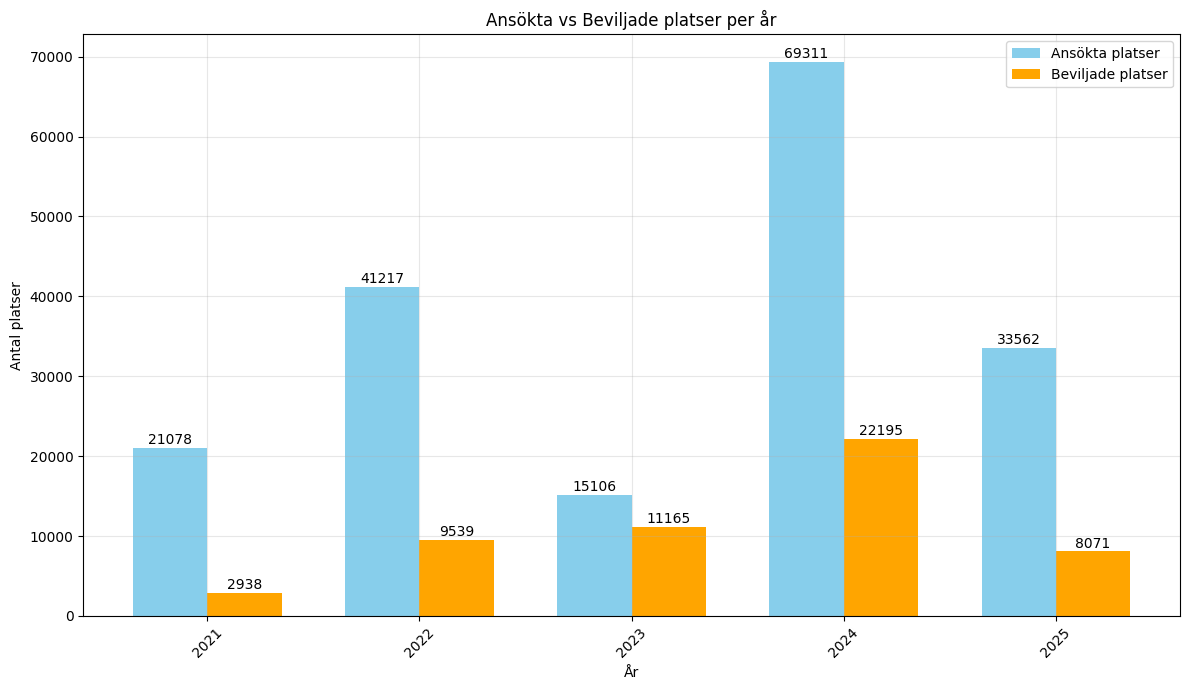

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Extrahera år och platser från summeringarna
ar = ["2021", "2022", "2023", "2024", "2025"]
ansokta = [
    ansokta_per_ar["Sökt antal  platser 2021"],
    ansokta_per_ar["Sökt antal platser 2022"],
    ansokta_per_ar["Sökt antal platser 2023"],
    ansokta_per_ar["Sökt antal platser 2024"] + ansokta_per_ar["Sökt antal platser 2024 (start och avslut 2024)"],
    ansokta_per_ar["Sökt antal platser 2025"]
]
beviljade = [
    beviljade_per_ar["Antal beviljade platser 2021"],
    beviljade_per_ar["Antal beviljade platser 2022"],
    beviljade_per_ar["Antal beviljade platser 2023"],
    beviljade_per_ar["Antal beviljade platser 2024"] + beviljade_per_ar["Antal beviljade platser start 2024"] + beviljade_per_ar["Antal beviljade platser start och slut 2024"],
    beviljade_per_ar["Antal beviljade platser start 2025"]
]

# Skapa en array för placering av staplar
x = np.arange(len(ar))

# Bredd på staplarna
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 7))

# Staplar för ansökta platser
bars1 = ax.bar(x - width/2, ansokta, width, label='Ansökta platser', color='skyblue')

# Staplar för beviljade platser
bars2 = ax.bar(x + width/2, beviljade, width, label='Beviljade platser', color='orange')

# Lägg till text, titel och etiketter
ax.set_xlabel('År')
ax.set_ylabel('Antal platser')
ax.set_title('Ansökta vs Beviljade platser per år')
ax.set_xticks(x)
ax.set_xticklabels(ar)
ax.legend()

# Visa värden ovanpå staplarna
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 100, int(yval), ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()


In [30]:
# Sammanställ ansökta platser per kurs
ansokta_per_kurs = ansokningar_df[["Utbildningsnamn"] + platser_kolumner].groupby("Utbildningsnamn").sum().reset_index()

# Sammanställ beviljade platser per kurs
beviljade_per_kurs = beviljade_df[["Utbildningsnamn"] + beviljade_kolumner].groupby("Utbildningsnamn").sum().reset_index()

# Slå ihop de två DataFrames baserat på kursnamn
merged_df = ansokta_per_kurs.merge(beviljade_per_kurs, on="Utbildningsnamn", how="outer")

# Fyll NaN med 0 för att undvika fel vid visualisering
merged_df.fillna(0, inplace=True)

print(merged_df.head())


                        Utbildningsnamn  Sökt antal  platser 2021  \
0              Futuregames Game Engines                      60.0   
1                           Grön vätgas                       0.0   
2   Trafikplanering för en hållbar stad                      30.0   
3     .Net-programmering - Azure DevOps                       0.0   
4       3D Clo Fördjupning Modedesigner                       0.0   

   Sökt antal platser 2022  Sökt antal platser 2023  Sökt antal platser 2024  \
0                     80.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                     60.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                     25.0   

   Sökt antal platser 2024 (start och avslut 2024)  Sökt antal platser 2025  \
0                        

In [31]:
import plotly.express as px

def visualisera_kurs(kurs_namn):
    # Filtrera DataFrame för vald kurs
    kurs_data = merged_df[merged_df["Utbildningsnamn"] == kurs_namn]
    
    # Sammanställ data för visualisering
    data = {
        "År": ["2021", "2022", "2023", "2024", "2025"],
        "Ansökta": [
            kurs_data["Sökt antal  platser 2021"].values[0],
            kurs_data["Sökt antal platser 2022"].values[0],
            kurs_data["Sökt antal platser 2023"].values[0],
            kurs_data["Sökt antal platser 2024"].values[0] + kurs_data["Sökt antal platser 2024 (start och avslut 2024)"].values[0],
            kurs_data["Sökt antal platser 2025"].values[0]
        ],
        "Beviljade": [
            kurs_data["Antal beviljade platser 2021"].values[0],
            kurs_data["Antal beviljade platser 2022"].values[0],
            kurs_data["Antal beviljade platser 2023"].values[0],
            kurs_data["Antal beviljade platser 2024"].values[0] + kurs_data["Antal beviljade platser start 2024"].values[0] + kurs_data["Antal beviljade platser start och slut 2024"].values[0],
            kurs_data["Antal beviljade platser start 2025"].values[0]
        ]
    }
    
    df_kurs = pd.DataFrame(data)
    
    # Skapa en interaktiv stapelgraf
    fig = px.bar(
        df_kurs, 
        x="År", 
        y=["Ansökta", "Beviljade"],
        barmode="group",
        title=f"Ansökta vs Beviljade platser för {kurs_namn}",
        labels={"value": "Antal platser", "variable": "Kategori"}
    )
    
    fig.update_layout(
        xaxis_title="År",
        yaxis_title="Antal platser",
        legend_title="Kategori",
        template="plotly_white"
    )
    
    fig.show()

# Exempel: Visualisera en kurs
visualisera_kurs("3D Clo Fördjupning Mönsterkonstruktör")



In [ ]:
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display

# Skapa en lista med unika kursnamn
kurs_lista = merged_df["Utbildningsnamn"].sort_values().unique()

# Skapa en dropdown-meny
dropdown = widgets.Dropdown(
    options=kurs_lista,
    value=kurs_lista[0],
    description="Välj kurs:",
    style={"description_width": "initial"},
    layout={"width": "50%"}
)

def visualisera_kurs(kurs_namn):
    # Filtrera DataFrame för vald kurs
    kurs_data = merged_df[merged_df["Utbildningsnamn"] == kurs_namn]
    
    # Sammanställ data för visualisering
    data = {
        "År": ["2021", "2022", "2023", "2024", "2025"],
        "Ansökta": [
            kurs_data["Sökt antal  platser 2021"].values[0],
            kurs_data["Sökt antal platser 2022"].values[0],
            kurs_data["Sökt antal platser 2023"].values[0],
            kurs_data["Sökt antal platser 2024"].values[0] + kurs_data["Sökt antal platser 2024 (start och avslut 2024)"].values[0],
            kurs_data["Sökt antal platser 2025"].values[0]
        ],
        "Beviljade": [
            kurs_data["Antal beviljade platser 2021"].values[0],
            kurs_data["Antal beviljade platser 2022"].values[0],
            kurs_data["Antal beviljade platser 2023"].values[0],
            kurs_data["Antal beviljade platser 2024"].values[0] + kurs_data["Antal beviljade platser start 2024"].values[0] + kurs_data["Antal beviljade platser start och slut 2024"].values[0],
            kurs_data["Antal beviljade platser start 2025"].values[0]
        ]
    }
    
    # Skapa en DataFrame för kursen
    df_kurs = pd.DataFrame(data)
    
    # Skapa en interaktiv stapelgraf
    fig = go.Figure()

    # Ansökta platser
    fig.add_trace(go.Bar(
        x=df_kurs["År"], 
        y=df_kurs["Ansökta"], 
        name="Ansökta platser",
        marker_color="steelblue"
    ))

    # Beviljade platser
    fig.add_trace(go.Bar(
        x=df_kurs["År"], 
        y=df_kurs["Beviljade"], 
        name="Beviljade platser",
        marker_color="seagreen"
    ))

    # Layout
    fig.update_layout(
        title=f"Ansökta vs Beviljade platser för {kurs_namn}",
        barmode="group",
        xaxis_title="År",
        yaxis_title="Antal platser",
        template="plotly_white",
        legend_title="Kategori"
    )
    
    fig.show()

# Koppla dropdown-menyn till visualiseringen
widgets.interactive(visualisera_kurs, kurs_namn=dropdown)
display(dropdown)


Dropdown(description='Välj kurs:', layout=Layout(width='50%'), options=(' Futuregames Game Engines', ' Grön vä…